In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


**Import** **Dataset**

In [2]:
dataset = pd.read_csv('PDFMalware2022.csv')
# Xoá cột fine name, inplace = True dùng để gán trực tiếp lại cho biến data không cần sử dụng toán tử gán
# axis=1 thể hiện thực hiện trên cột, axis=0 thực hiện trên dòng
dataset.drop(["Fine name"], axis=1, inplace=True)

dataset

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,\t%PDF-1.6,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3,No,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
10022,73.0,314.0,1.0,16.0,3.0,0.0,0.0,-1,unclear,\t%PDF-\x07.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
10023,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
10024,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious


**Đếm thuộc tính "Malicious" trên "Class"**

In [3]:
b = dataset['Class']
malicious_count = b[b == 'Malicious'].count()
malicious_count

5557

In [4]:
dataset.dtypes

pdfsize             float64
metadata size       float64
pages               float64
xref Length         float64
title characters    float64
isEncrypted         float64
embedded files      float64
images               object
text                 object
header               object
obj                  object
endobj               object
stream              float64
endstream            object
xref                 object
trailer             float64
startxref            object
pageno               object
encrypt             float64
ObjStm              float64
JS                   object
Javascript           object
AA                   object
OpenAction           object
Acroform             object
JBIG2Decode          object
RichMedia            object
launch               object
EmbeddedFile         object
XFA                  object
Colors              float64
Class                object
dtype: object

**Preproccessing**

In [5]:
# Input vào model chỉ có số, mà trong data ở trên có những cột có cả text (những cột này python định nghĩa dạng dữ liệu object, vì vậy cần chuyển về dạng dữ liệu số)
# Ordinal encoder thực hiện việc chuyển đổi data từ dạng khác (object, string,...) về dạng số. Ví dụ ["text1", "hi", "an com chua", "helu"] -> [0, 1, 2, 3]

# Import thư viện, hàm Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

# Lọc ra những cột có thuộc tính là object từ dataframe (dataframe là cái biến dataset á), sau đó gán mảng chứa tên các thuộc tính là object vào biến tên là "object columns"
# Từ cell dataset.dtypes phía trên thì có thể thấy được chỉ có object và float, vì vậy không cần lo là nó có các dạng khác như string
# Thật ra object là dạng dữ liệu tổng quát nhất của python, nên trong object cũng có string rồi
object_columns = dataset.select_dtypes(include=['object']).columns

In [6]:
dataset[object_columns]

,images,text,header,obj,endobj,endstream,xref,startxref,pageno,JS,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Class
0,0,No,\t%PDF-1.3,10,10,3,1,1,1,1,1,0,1,0,0,0,0,0,0,Malicious
1,0,No,\t%PDF-1.6,19,19,9,1,1,1,0,0,0,0,1,0,0,0,8,1,Malicious
2,0,Yes,\t%PDF-1.3,12,12,3,1,1,2,1,2,0,1,0,0,0,0,0,0,Malicious
3,0,No,\t%PDF-1.3,14,14,2,1,1,1,2,3,0,1,1,0,0,0,0,0,Malicious
4,0,Yes,\t%PDF-1.3,15,15,4,1,1,3,1,2,0,1,0,0,0,0,0,0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,3,No,\t%PDF-1.3,9,9,3,1,1,1,1,1,0,1,0,0,0,0,0,0,Malicious
10022,-1,unclear,\t%PDF-\x07.3,8,7,2,1,1,1,1(1),1,0,1,0,0,0,0,0,0,Malicious
10023,0,Yes,\t%PDF-1.3,8,8,2,1,1,1,1,1,0,1,0,0,0,0,0,0,Malicious
10024,0,Yes,\t%PDF-1.3,9,9,3,1,1,1,1,1,0,1,0,0,0,0,0,0,Malicious


In [7]:
# Khai báo biến encoder 
encoder = OrdinalEncoder()

# Tiến hành fit và transform các cột có dạng dữ liệu là object trong dataframe
dataset[object_columns] = encoder.fit_transform(dataset[object_columns])

# Có thể viết tách ra như sau
# encoder.fit(dataset[object_columns])
# dataset[object_columns] = encoder.transform(dataset[object_columns])

In [8]:
# Check số lượng dòng bị khuyết của mỗi cột
# Giúp có cái nhìn tổng quan về phạm vi và mức độ của dữ liệu bị thiếu trong DataFrame
dataset.isna().sum()

pdfsize             1
metadata size       1
pages               1
xref Length         1
title characters    1
isEncrypted         1
embedded files      1
images              1
text                1
header              1
obj                 3
endobj              3
stream              3
endstream           3
xref                3
trailer             3
startxref           3
pageno              3
encrypt             3
ObjStm              3
JS                  3
Javascript          3
AA                  3
OpenAction          3
Acroform            3
JBIG2Decode         3
RichMedia           3
launch              3
EmbeddedFile        3
XFA                 3
Colors              3
Class               1
dtype: int64

In [9]:
# Sau khi xử lí có vài giá trị khuyết, vì vậy bỏ những cột bị khuyết giá trị bằng câu lệnh sau
# Làm như thế nào để check thì 
dataset.dropna(inplace=True)
dataset.isna().sum()

pdfsize             0
metadata size       0
pages               0
xref Length         0
title characters    0
isEncrypted         0
embedded files      0
images              0
text                0
header              0
obj                 0
endobj              0
stream              0
endstream           0
xref                0
trailer             0
startxref           0
pageno              0
encrypt             0
ObjStm              0
JS                  0
Javascript          0
AA                  0
OpenAction          0
Acroform            0
JBIG2Decode         0
RichMedia           0
launch              0
EmbeddedFile        0
XFA                 0
Colors              0
Class               0
dtype: int64

In [10]:
y = dataset['Class']
X = dataset.drop(['Class'], axis =1)

In [11]:
# Chuyển dữ liệu về int
# Vì đây là mô hình phân loại nên sẽ để hai biến độc lập, còn float thì máy có thể hiểu nó là hai biến liên tục
# 1.0 đến 2.0 là liên tục nè, còn 1 với 2 là độc lập. Hoặc "1" với "2" (string) cũng là độc lập
# Bước này làm cho chắc thoi
y = y.astype(int)

Class
1.0    5555
0.0    4468
Name: count, dtype: int64


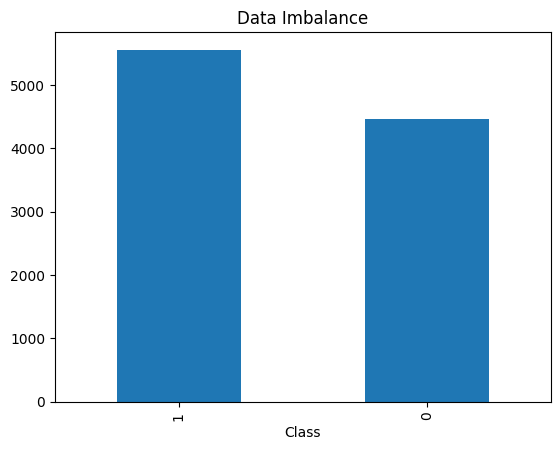

In [12]:
# Vẽ biểu đồ số lượng nhãn của cột target, biểu đồ cột-bar chart

c = pd.DataFrame(data=y)
c.Class.value_counts().plot(kind='bar', title='Data Imbalance');
print(dataset['Class'].value_counts())

**SMOTE**
(**Random** **Over** **Sampler**)

In [13]:
# MinMax Scaler chuẩn hóa giá trị từ 0-1 => đồng nhất, dễ quản lý, cải thiện hiệu suất, máy đọc từ 0->1
# Ngoài ra còn có StandardScaler chuẩn hoá giá trị về phạm vi -1, 1 (đôi lúc có thể ngoài xíu)
# Khác nhau chỗ nào thì tìm hiểu, cũng dễ á

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
# Đưa dữ liệu cho mô hình học
mm.fit(X)

# Chuyển đổi dữ liệu sau khi mô hình đã học
X_mm = mm.transform(X)
# X_mm =mm.fit_transform(X)

Random Oversampling: Randomly duplicate examples in the minority class. (1: 900; 0: 100 -> 1: 900; 0: 900)

Random Undersampling: Randomly delete examples in the majority class.(1: 900; 0: 100 -> 1: 100; 0: 100)

In [14]:
# Cân bằng dữ liệu, lấy duplicate mẫu trong class ít để cho nhiều lên bằng class còn lại

OverSampler = RandomOverSampler(random_state=0, sampling_strategy='auto')
X_resample, y_resample = OverSampler.fit_resample(X,y)

In [15]:
X_mm

array([[3.77881345e-04, 2.34498484e-03, 3.35570470e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04],
       [6.71789058e-04, 2.91503641e-03, 1.67785235e-03, ...,
        9.44444444e-01, 3.33333333e-01, 1.75963400e-04],
       [2.09934081e-04, 6.07623144e-03, 5.03355705e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04],
       ...,
       [2.09934081e-04, 4.89726116e-03, 5.03355705e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04],
       [1.63748583e-03, 4.39198818e-03, 3.35570470e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04],
       [1.25960448e-04, 2.34498484e-03, 3.35570470e-03, ...,
        5.55555556e-02, 1.66666667e-01, 1.75963400e-04]])

In [16]:
# Khúc này code có sẵn print ra để xem thôi chứ không có gì, bỏ cell này cũng được cho đỡ rối
conv = pd.DataFrame(X_mm,columns=  X.columns)

conv

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors
0,0.000378,0.002345,0.003356,0.000045,0.000013,0.2,0.166667,0.011364,0.50,0.204082,...,0.058824,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
1,0.000672,0.002915,0.001678,0.000080,0.000104,0.2,0.166667,0.011364,0.50,0.428571,...,0.029412,0.025641,0.142857,0.222222,0.066667,0.166667,0.25,0.944444,0.333333,0.000176
2,0.000210,0.006076,0.005034,0.000053,0.000221,0.2,0.166667,0.011364,0.75,0.204082,...,0.323529,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
3,0.000756,0.003252,0.003356,0.000061,0.000013,0.2,0.166667,0.011364,0.50,0.204082,...,0.470588,0.025641,0.285714,0.222222,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
4,0.000336,0.003278,0.006711,0.000064,0.000597,0.2,0.166667,0.011364,0.75,0.204082,...,0.323529,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10018,0.022253,0.003848,0.003356,0.000333,0.000117,0.2,0.166667,0.352273,0.50,0.204082,...,0.058824,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
10019,0.003107,0.004081,0.003356,0.000064,0.000052,0.2,0.166667,0.000000,1.00,0.693878,...,0.058824,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
10020,0.000210,0.004897,0.005034,0.000053,0.000156,0.2,0.166667,0.011364,0.75,0.204082,...,0.058824,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
10021,0.001637,0.004392,0.003356,0.757637,0.000182,0.2,0.166667,0.011364,0.75,0.204082,...,0.058824,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mm, y, train_size=0.8)

**Import Library SMOTE**

In [18]:
# Cũng là phương pháp cân bằng dữ liệu khác, tạo sinh dữ liệu của lớp ít cho bằng với lớp nhiều 
# (tự tạo thêm điểm dữ liệu từ những điểm dữ liệu có sẵn, thuật toán tự tìm hiểu thêm, cũng dễ hiểu)
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

Class
0        4459
1        4459
Name: count, dtype: int64


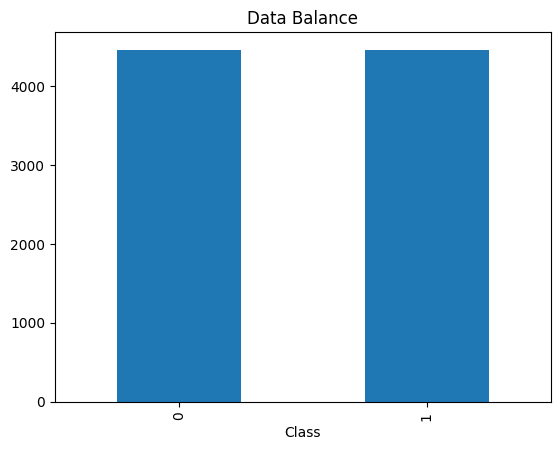

In [20]:
c = pd.DataFrame(data=y_smote,columns=["Class"])
c.Class.value_counts().plot(kind='bar', title='Data Balance');
print (c.value_counts())

In [21]:
X_smote

array([[0.00323298, 0.00340735, 0.0033557 , ..., 0.05555556, 0.16666667,
        0.00052789],
       [0.0006298 , 0.00332962, 0.00503356, ..., 0.05555556, 0.16666667,
        0.00017596],
       [0.00335895, 0.00519524, 0.00503356, ..., 0.05555556, 0.16666667,
        0.00017596],
       ...,
       [0.01109057, 0.00370124, 0.00712213, ..., 0.05555556, 0.16666667,
        0.00017596],
       [0.00278329, 0.00339755, 0.0033557 , ..., 0.05555556, 0.16666667,
        0.00236317],
       [0.00331263, 0.00507075, 0.00503356, ..., 0.05555556, 0.16666667,
        0.00017596]])

In [22]:
y_smote

0       0
1       1
2       0
3       1
4       0
       ..
8913    0
8914    0
8915    0
8916    0
8917    0
Name: Class, Length: 8918, dtype: int32

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Tạo một biến lưu mô hình KNeighborsClassifier
model = RandomForestClassifier()

model.fit (X_train, y_train)

RandomForestClassifier()

In [24]:
model.score(X_test, y_test)

0.9930174563591022

In [25]:
# Dự đoán
model.predict ([X_test[2]])

array([1])

In [26]:
# Xác xuất để ra là 0 và 1 tương ứng là không là mã độc, là mã độc
model.predict_proba([X_test[2]])

array([[0., 1.]])

In [27]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 902,    7],
       [   7, 1089]], dtype=int64)

**Tính time model train**

In [28]:
import time

start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()

execution_time = end_time - start_time
print("Thời gian thực hiện: ", execution_time, "giây")

Thời gian thực hiện:  0.030916213989257812 giây


In [29]:
len(X_test)

2005

In [30]:
y_test

6078    0
417     1
537     1
364     1
1158    1
       ..
6565    0
145     1
303     1
3577    1
1600    1
Name: Class, Length: 2005, dtype: int32

In [31]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

**Classification Report**

In [32]:
from sklearn.metrics import classification_report

In [33]:
print (classification_report(y_test, y_pred,digits=5))

              precision    recall  f1-score   support

           0    0.99230   0.99230   0.99230       909
           1    0.99361   0.99361   0.99361      1096

    accuracy                        0.99302      2005
   macro avg    0.99296   0.99296   0.99296      2005
weighted avg    0.99302   0.99302   0.99302      2005



**Confunsion Matrix**

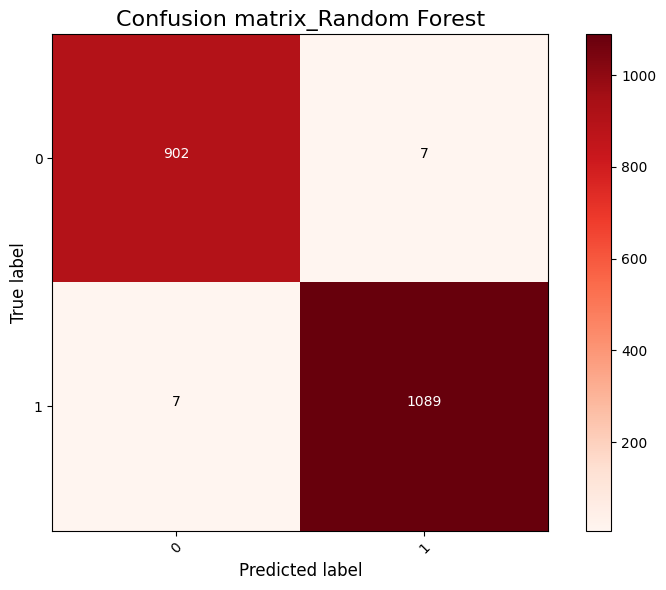

In [35]:
from sklearn.metrics import confusion_matrix
import itertools

# Danh sách dữ liệu mẫu y_true và y_pred
y_true = y_test

# Lấy các nhãn duy nhất từ y_true và y_pred để biết số lượng lớp
labels = np.unique(y_true)

# Tính confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Chuẩn bị vẽ confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion matrix_Random Forest', fontsize=16)
plt.colorbar()

# Định dạng các trục x và y
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Định dạng các giá trị trên ô
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Đặt tên trục và hiển thị
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.tight_layout()
plt.show()
